<a href="https://colab.research.google.com/github/Adhiraj-11/blank/blob/main/ProjectBookRecommen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow.keras as tf
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
books_df = pd.read_csv("https://raw.githubusercontent.com/Adhiraj-11/blank/main/dataset/Books.csv") 
ratings_df = pd.read_csv("https://raw.githubusercontent.com/Adhiraj-11/blank/main/dataset/Ratings.csv")

In [ ]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [ ]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


###Books dataset has 23 columns and and contains different data about the books.


In [ ]:
print(ratings_df.shape)

(981756, 3)


In [ ]:
print(ratings_df.user_id.nunique())
print(ratings_df.book_id.nunique())

53424
10000


####There are over 900,000 ratings given by 53,424 users to about 10,000 books





In [ ]:
ratings_df.isna().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(ratings_df, test_size=0.2, random_state=1)

In [ ]:
print(f"Shape of train data: {Xtrain.shape}")
print(f"Shape of test data: {Xtest.shape}")

Shape of train data: (785404, 3)
Shape of test data: (196352, 3)


#Building the model

In [ ]:
#Get the number of unique entities in books and users columns
nbook_id = ratings_df.book_id.nunique()
nuser_id = ratings_df.user_id.nunique()

In [ ]:
#Book input network
input_books = tf.layers.Input(shape=[1])
embed_books = tf.layers.Embedding(nbook_id + 1,15)(input_books)
books_out = tf.layers.Flatten()(embed_books)

#user input network
input_users = tf.layers.Input(shape=[1])
embed_users = tf.layers.Embedding(nuser_id + 1,15)(input_users)
users_out = tf.layers.Flatten()(embed_users)

conc_layer = tf.layers.Concatenate()([books_out, users_out])
x = tf.layers.Dense(128, activation='relu')(conc_layer)
x_out = x = tf.layers.Dense(1, activation='relu')(x)
model = tf.Model([input_books, input_users], x_out)

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 15)        150015      ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 15)        801375      ['input_2[0][0]']                
                                                                                              

In [ ]:
hist = model.fit([Xtrain.book_id, Xtrain.user_id], Xtrain.rating, 
                 batch_size=64, 
                 epochs=5, 
                 verbose=1,
                 validation_data=([Xtest.book_id, Xtest.user_id], Xtest.rating))

Epoch 1/5
12272/12272 [==============================] - 58s 4ms/step - loss: 0.8618 - val_loss: 0.7185
Epoch 2/5
12272/12272 [==============================] - 47s 4ms/step - loss: 0.6848 - val_loss: 0.6979
Epoch 3/5
12272/12272 [==============================] - 47s 4ms/step - loss: 0.6511 - val_loss: 0.6942
Epoch 4/5
12272/12272 [==============================] - 47s 4ms/step - loss: 0.6219 - val_loss: 0.6971
Epoch 5/5
12272/12272 [==============================] - 47s 4ms/step - loss: 0.5914 - val_loss: 0.7044


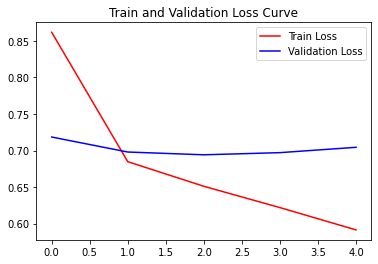

In [ ]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(train_loss, color='r', label='Train Loss')
plt.plot(val_loss, color='b', label='Validation Loss')
plt.title("Train and Validation Loss Curve")
plt.legend()
plt.show()

In [ ]:
#save the model
model.save('model')

In [ ]:
books_df_copy = books_df.copy()
books_df_copy = books_df_copy.set_index("book_id")

In [ ]:
# Extract embeddings
book_em = model.get_layer('embedding')
book_em_weights = book_em.get_weights()[0]
book_em_weights.shape

(10001, 15)

In [ ]:
b_id =list(ratings_df.book_id.unique())
# b_id.remove(10000)
# dict_map = {}
# for i in b_id:
#     dict_map[i] = books_df_copy.iloc[i]['title']
    
# out_v = open('vecs.tsv', 'w')
# out_m = open('meta.tsv', 'w')
# for i in b_id:
#     book = dict_map[i]
#     embeddings = book_em_weights[i]
#     out_m.write(book + "\n")
#     out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
    
# out_v.close()
# out_m.close()

In [ ]:
#Making recommendations for user 100
book_arr = np.array(b_id) #get all book IDs
user = np.array([10 for i in range(len(b_id))])
pred = model.predict([book_arr, user])
pred

array([[4.424616 ],
       [4.2810254],
       [3.5628982],
       ...,
       [4.2137847],
       [3.9285088],
       [3.958225 ]], dtype=float32)

In [ ]:
pred = pred.reshape(-1) #reshape to single dimension
pred_ids = (-pred).argsort()[0:5]
pred_ids

array([ 957, 8108, 3274,  861, 3627])

In [ ]:
books_df.iloc[pred_ids]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
957,958,3579,3579,7365,40,553609416,7.678361e+10,L.M. Montgomery,1908.0,The Complete Anne of Green Gables Boxed Set,...,92142,93067,1438,1395,1991,9286,23394,57001,https://images.gr-assets.com/books/1267721500m...,https://images.gr-assets.com/books/1267721500s...
8108,8109,23753,23753,1789924,5,1401210821,9.781401e+12,"Neil Gaiman, Mike Dringenberg, Chris Bachalo, ...",2006.0,"The Absolute Sandman, Volume One",...,13401,13726,476,72,128,684,2744,10098,https://images.gr-assets.com/books/1312226853m...,https://images.gr-assets.com/books/1312226853s...
3274,3275,8,8,21457576,11,439682584,9.780440e+12,"J.K. Rowling, Mary GrandPré",2003.0,NaN,...,33220,33424,156,317,233,978,3686,28210,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
861,862,17332218,17332218,16482835,34,765326361,9.780765e+12,Brandon Sanderson,2014.0,Words of Radiance,...,73572,108176,7261,154,404,2653,18272,86693,https://images.gr-assets.com/books/1391535251m...,https://images.gr-assets.com/books/1391535251s...
3627,3628,24812,24812,25599,14,740748475,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,...,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...


In [ ]:
web_book_data = books_df[["book_id", "title", "image_url", "authors"]]
web_book_data = web_book_data.sort_values('book_id')
web_book_data.head()

,book_id,title,image_url,authors
26,1,Harry Potter and the Half-Blood Prince (Harry ...,https://images.gr-assets.com/books/1361039191m...,"J.K. Rowling, Mary GrandPré"
20,2,Harry Potter and the Order of the Phoenix (Har...,https://images.gr-assets.com/books/1387141547m...,"J.K. Rowling, Mary GrandPré"
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,https://images.gr-assets.com/books/1474154022m...,"J.K. Rowling, Mary GrandPré"
17,5,Harry Potter and the Prisoner of Azkaban (Harr...,https://images.gr-assets.com/books/1499277281m...,"J.K. Rowling, Mary GrandPré, Rufus Beck"
23,6,Harry Potter and the Goblet of Fire (Harry Pot...,https://images.gr-assets.com/books/1361482611m...,"J.K. Rowling, Mary GrandPré"


In [ ]:
web_book_data.to_json(r'web_book_data.json', orient='records')